In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
#import fix_yahoo_finance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


#The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

#Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-08-15,174.860001,177.910004,173.990005,177.589996,177.589996,51698500,AMAZON
2024-08-16,177.039993,178.339996,176.259995,177.059998,177.059998,31489200,AMAZON
2024-08-19,177.639999,178.300003,176.160004,178.220001,178.220001,31129800,AMAZON
2024-08-20,177.919998,179.009995,177.429993,178.880005,178.880005,26255200,AMAZON
2024-08-21,179.919998,182.389999,178.889999,180.110001,180.110001,35599100,AMAZON
2024-08-22,181.380005,181.470001,175.679993,176.130005,176.130005,32047500,AMAZON
2024-08-23,177.339996,178.970001,175.240005,177.039993,177.039993,29150100,AMAZON
2024-08-26,176.699997,177.470001,174.300003,175.500000,175.500000,22366200,AMAZON
2024-08-27,174.149994,174.889999,172.250000,173.119995,173.119995,29842000,AMAZON


In [7]:
# Prediction the high price stock price of APPLE inc

#Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
#show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402625,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469281,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607716,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739513,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719307,394024400
...,...,...,...,...,...,...
2024-08-22,227.789993,228.339996,223.899994,224.529999,224.529999,43695300
2024-08-23,225.660004,228.220001,224.330002,226.839996,226.839996,38677300
2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200


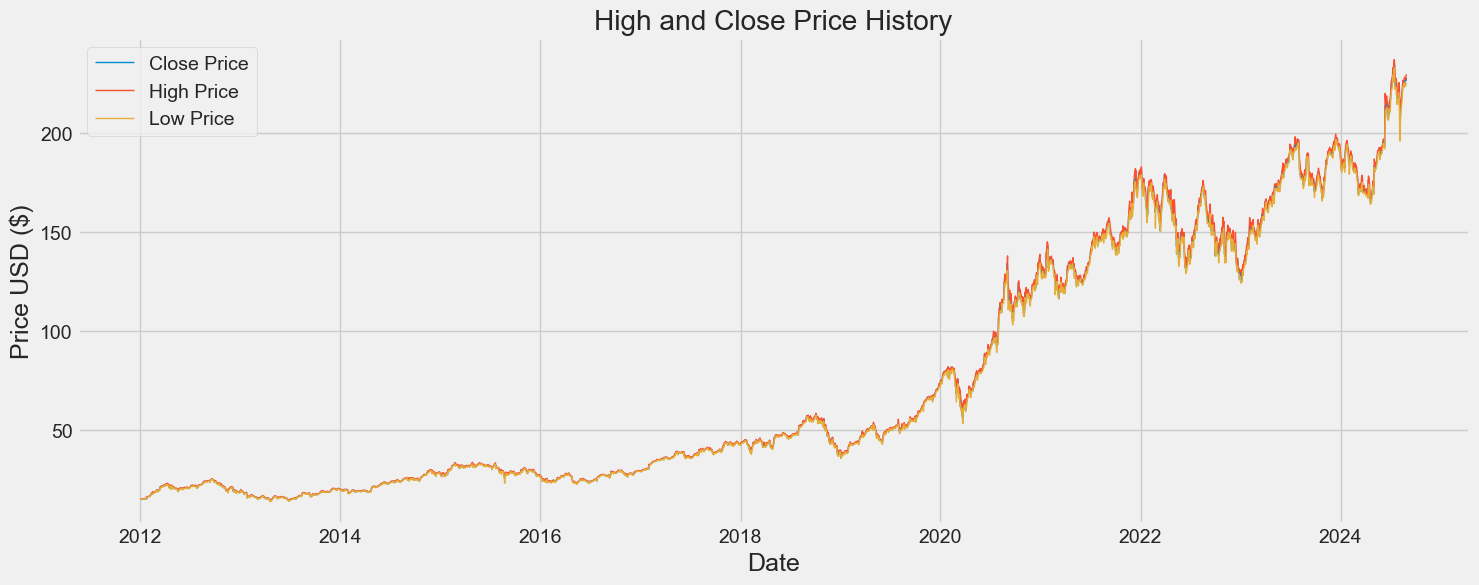

In [16]:
plt.figure(figsize=(16,6))
plt.title('High and Close Price History')
plt.plot(df['Close'], label='Close Price', linewidth=1)
plt.plot(df['High'], label='High Price', linewidth=1)
plt.plot(df['Low'], label='Low Price', linewidth=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.legend(loc='best')  # To show the labels on the plot
plt.show()

In [117]:
# Create a new dataframe with only the 'Close column
close_data = df.filter(['Close'])
high_data = df.filter(['High'])
low_data = df.filter(['Low'])
#Convert the dataframe to a numpy array
close_dataset = close_data.values
high_dataset = high_data.values
low_dataset = low_data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil(len(close_dataset) * .95))

training_data_len

3025

In [118]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
close_scaled_data = scaler.fit_transform(close_dataset)
high_scaled_data = scaler.fit_transform(high_dataset)
low_scaled_data = scaler.fit_transform(low_dataset)

close_scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.96540984],
       [0.96925824],
       [0.96228593]])

In [119]:
#Create the training data set
#Create the sclaed training data set
close_train_data = close_scaled_data[0:int(training_data_len), :]
high_train_data = high_scaled_data[0:int(training_data_len), :]
low_train_data = low_scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train sets
x_train = []
y_train_close = []
y_train_high = []
y_train_low = []


for i in range(60, len(close_train_data)):
    # Combine 'Close', 'High', and 'Low' data into one array for each time step
    x_train.append(np.column_stack((close_train_data[i-60:i, 0], 
                                    high_train_data[i-60:i, 0], 
                                    low_train_data[i-60:i, 0])))
    
    # Separate target variables for each model
    y_train_close.append(close_train_data[i, 0])
    y_train_high.append(high_train_data[i, 0])
    y_train_low.append(low_train_data[i, 0])


# Convert the x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train_close = np.array(y_train_close)
y_train_high = np.array(y_train_high)
y_train_low = np.array(y_train_low)
#print(y_train_close)

# Reshape the x_train data to be 3D [samples, time steps, features]
# Since we have 60 time steps and 3 features (close, high, low)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 3))

# Check the shape of x_train to verify
x_train.shape  # Should be (number of samples, 60, 3)
y_train_close.shape

(2965,)

In [123]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Function to create a new model instance
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    return model

# Assuming x_train has the correct shape (samples, timesteps, features)
input_shape = (x_train.shape[1], 3)

# Create separate models for close, high, and low
model_close = build_lstm_model(input_shape)
model_high = build_lstm_model(input_shape)
model_low = build_lstm_model(input_shape)

#compile the model
model_close.compile(optimizer='adam', loss='mean_squared_error')
model_high.compile(optimizer='adam', loss='mean_squared_error')
model_low.compile(optimizer='adam', loss='mean_squared_error')

#train the model
model_close.fit(x_train, y_train_close, batch_size=5, epochs=10)
model_high.fit(x_train, y_train_high, batch_size=5, epochs=10)
model_low.fit(x_train, y_train_low, batch_size=5, epochs=10)

Epoch 1/10
593/593 [==============================] - 22s 32ms/step - loss: 6.4178e-04
Epoch 2/10
593/593 [==============================] - 19s 32ms/step - loss: 4.4140e-04
Epoch 3/10
593/593 [==============================] - 20s 33ms/step - loss: 2.4599e-04
Epoch 4/10
593/593 [==============================] - 20s 34ms/step - loss: 1.6793e-04
Epoch 5/10
593/593 [==============================] - 20s 33ms/step - loss: 1.7611e-04
Epoch 6/10
593/593 [==============================] - 20s 33ms/step - loss: 1.2125e-04
Epoch 7/10
593/593 [==============================] - 20s 33ms/step - loss: 1.4674e-04
Epoch 8/10
593/593 [==============================] - 20s 34ms/step - loss: 1.7636e-04
Epoch 9/10
593/593 [==============================] - 21s 35ms/step - loss: 9.7318e-05
Epoch 10/10
593/593 [==============================] - 21s 36ms/step - loss: 1.2451e-04
Epoch 1/10
593/593 [==============================] - 23s 32ms/step - loss: 0.0012
Epoch 2/10
593/593 [==========================

In [124]:
#Create the testing data set
#Create a new array containing scaled values
test_data_close = close_scaled_data[training_data_len - 60: , :]
test_data_high = high_scaled_data[training_data_len - 60: , :]
test_data_low = low_scaled_data[training_data_len - 60: , :]

#Split the data into x_train and y_train sets
x_test = []
y_test_close = close_dataset[training_data_len:, :]
y_test_high = high_dataset[training_data_len:, :]
y_test_low = low_dataset[training_data_len:, :]

#print(y_test_close)

for i in range(60, len(test_data_close)):
    # Combine 'Close', 'High', and 'Low' data into one array for each time step
    x_test.append(np.column_stack((test_data_close[i-60:i, 0], 
                                    test_data_high[i-60:i, 0], 
                                    test_data_low[i-60:i, 0])))
    



#convert the data to a numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 3))

# Initialize an empty array to hold the combined predictions
predictions = np.zeros((x_test.shape[0], 3))
#Get the models predicted price values
predictions[:, 0] = model_close.predict(x_test).flatten()  # Close predictions
predictions[:, 1] = model_high.predict(x_test).flatten()   # High predictions
predictions[:, 2] = model_low.predict(x_test).flatten()    # Low predictions
predictions = scaler.inverse_transform(predictions)

# Now you have the inverse transformed predictions for Close, High, and Low
predictions_close = predictions[:, 0]  # Extract Close predictions
predictions_high = predictions[:, 1]   # Extract High predictions
predictions_low = predictions[:, 2]    # Extract Low predictions

#get the root mean squared error (RMSE)
y_test_close = y_test_close[:, 0]  # Extract Close prices (first column)
rmse = np.sqrt(np.mean(((predictions_close - y_test_close) ** 2)))
print(f'Close: {rmse}')
rmse = np.sqrt(np.mean(((predictions_high - y_test_high) ** 2)))
print(f'High: {rmse}')
rmse = np.sqrt(np.mean(((predictions_low - y_test_low) ** 2)))
print(f'Low: {rmse}')

5/5 [==============================] - 1s 21ms/step
Close: 3.8324593294737457
High: 29.25031045098724
Low: 29.050239317428026


Length of valid_index: 159
Length of y_test_close: 159
Length of y_test_high: 159
Length of y_test_low: 159


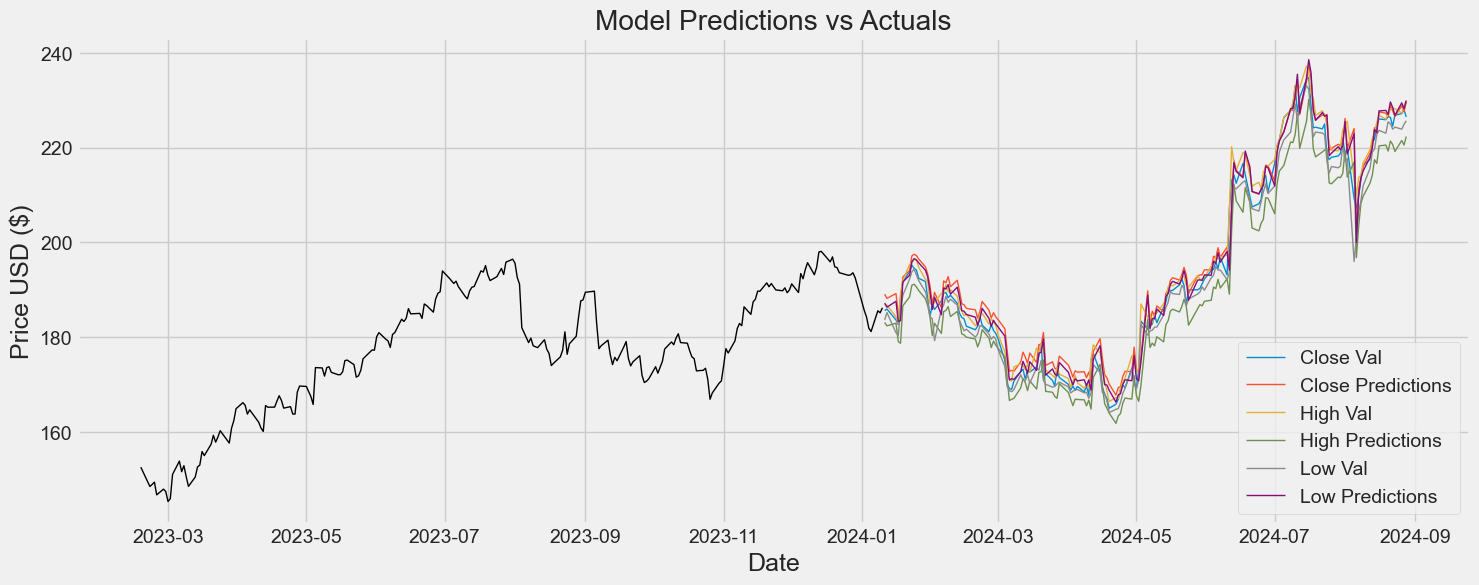

Low Val: [183.61999512 185.19000244 180.92999268 180.30000305 185.83000183
 188.82000732 192.25999451 193.83000183 194.33999634 193.11000061]
Low Predictions: [187.17658505 186.32233839 187.56012143 183.27144812 183.49252049
 191.64504471 193.06959534 195.91436929 196.57420038 196.29820636]


In [125]:
# # Assuming close_data, high_data, and low_data are pandas DataFrames
# valid_index = close_data[training_data_len + 60:].index  # Adjusting to match y_test lengths
# Adjust valid_index to cover the correct range
valid_index = close_data[training_data_len:training_data_len + len(y_test_close)].index


print(f"Length of valid_index: {len(valid_index)}")
print(f"Length of y_test_close: {len(y_test_close.flatten())}")
print(f"Length of y_test_high: {len(y_test_high.flatten())}")
print(f"Length of y_test_low: {len(y_test_low.flatten())}")

# Ensure that the index matches the length of your y_test and predictions data
assert len(valid_index) == len(y_test_close.flatten()), "Mismatch in lengths!"

# Create a DataFrame for the validation data and predictions
valid_data = pd.DataFrame({
    'Close': y_test_close.flatten(),
    'Close Predictions': predictions_close.flatten(),
    'High': y_test_high.flatten(),
    'High Predictions': predictions_high.flatten(),
    'Low': y_test_low.flatten(),
    'Low Predictions': predictions_low.flatten(),
}, index=valid_index)  # Use the same index as the validation data

# Visualize data
plt.figure(figsize=(16, 6))
plt.title('Model Predictions vs Actuals')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)

# Plot the actual training data for Close
train_close = close_data[2800:training_data_len].copy()
plt.plot(train_close.index, train_close['Close'], linewidth=1, color='black')

# Plot the actual vs predicted values for Close, High, and Low
plt.plot(valid_data.index, valid_data['Close'], linewidth=1, label='Close Val')
plt.plot(valid_data.index, valid_data['Close Predictions'], linewidth=1, label='Close Predictions')
plt.plot(valid_data.index, valid_data['High'], linewidth=1, label='High Val')
plt.plot(valid_data.index, valid_data['High Predictions'], linewidth=1, label='High Predictions')
plt.plot(valid_data.index, valid_data['Low'], linewidth=1, label='Low Val')
plt.plot(valid_data.index, valid_data['Low Predictions'], linewidth=1, label='Low Predictions')

# Adding the legend
plt.legend(loc='lower right')

# Show the plot
plt.show()
